In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [3]:
movie_title=[]
run_time=[]
year=[]
categorie=[]
rating=[]
Metascore=[]
votes=[]
Gross=[]
director=[]
star=[]
out_line=[]


for j in range(1,6):
    page=requests.get(f"https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page={j}")
    soup=BeautifulSoup(page.text)


    for i in soup.find_all("div", class_="lister-item mode-detail"):

        movie_title_pattern = re.findall("(.+)\n\(", i.text)
        if movie_title_pattern:
            movie_title.append(movie_title_pattern[0])
        else:
            movie_title.append(np.nan)


        run_time_pattern = re.findall("\d+\smin", i.text)
        if run_time_pattern:
            run_time.append(run_time_pattern[0])
        else:
            run_time.append(np.nan)


        year_pattern = re.findall("\((\d+)", i.text)
        if year_pattern:
            year.append(year_pattern[0])
        else:
            year.append(np.nan)


        categorie_pattern = re.findall("\|\n\n\s*([A-Za-z]+(?:,\s*[A-Za-z]+)*)", i.text)
        if categorie_pattern:
            categorie.append(categorie_pattern[0])
        else:
            categorie.append(np.nan)

        # Rating
        rating_pattern = re.findall("\n{10}(\d.+)", i.text)
        if rating_pattern:
            rating.append(rating_pattern[0])
        else:
            rating.append(np.nan)


        if re.findall("(\d+).+\n.+Metascore",i.text):
            Metascore.append(re.findall("(\d+).+\n.+Metascore",i.text)[0])
        else:
            Metascore.append(np.nan)

        votes.append(re.findall("Votes:\n(.+)",i.text)[0])
        if re.findall("\$(.+)",i.text):
                Gross.append(re.findall("\$(.+)",i.text)[0])
        else:
            Gross.append(np.nan)


        director_pattern = re.findall(r"Direct.+\n\s*(.*(?:\s\n.*)*)\n\|\s", i.text)
        if director_pattern:
            director.extend([d.replace("\n", '') for d in director_pattern])
        else:
            director.append(np.nan)



        empty_list = re.findall("Stars:\s*(.+(?:\s\n.*)*)\n\n\nVotes", i.text)
        if empty_list:
            star.extend([d.replace(' \n','') for d in empty_list])
        else:
            star.append(np.nan)  


        if re.findall("\n(.*)\n\s\s\s\s\sDirec.+",i.text):
                out_line.append(re.findall("\n(.*)\n\s\s\s\s\sDirec.+",i.text)[0])
        else:
            out_line.append(np.nan)

In [4]:
import numpy as np
import pandas as pd
data=pd.DataFrame({
    'Movie_Title': movie_title,
    'Run_Time': run_time,
    'Release_Year': year,
    'Category': categorie,
    'Rating': rating,
    'Metascore': Metascore,
    'Votes_Count': votes,
    'Gross_Earnings': Gross,
    'Director': director,
    'Stars': star
})

In [5]:
data

,Movie_Title,Run_Time,Release_Year,Category,Rating,Metascore,Votes_Count,Gross_Earnings,Director,Stars
0,The Godfather,175 min,1972,"Crime, Drama",9.2,100,"1,966,338",134.97M,Francis Ford Coppola,"Marlon Brando,Al Pacino,James Caan,Diane Keaton"
1,The Silence of the Lambs,118 min,1991,"Crime, Drama, Thriller",8.6,86,"1,508,787",130.74M,Jonathan Demme,"Jodie Foster,Anthony Hopkins,Scott Glenn,Ted L..."
2,Star Wars: Episode V - The Empire Strikes Back,124 min,1980,"Action, Adventure, Fantasy",8.7,82,"1,351,518",290.48M,Irvin Kershner,"Mark Hamill,Harrison Ford,Carrie Fisher,Billy ..."
3,The Shawshank Redemption,142 min,1994,Drama,9.3,82,"2,821,178",28.34M,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton,William ..."
4,The Shining,146 min,1980,"Drama, Horror",8.4,66,"1,081,837",44.02M,Stanley Kubrick,"Jack Nicholson,Shelley Duvall,Danny Lloyd,Scat..."
...,...,...,...,...,...,...,...,...,...,...
495,"Me, Myself & Irene",116 min,2000,Comedy,6.6,49,"247,457",90.57M,"Bobby Farrelly, Peter Farrelly","Jim Carrey,Renée Zellweger,Anthony Anderson,Mo..."
496,The Darjeeling Limited,91 min,2007,"Adventure, Comedy, Drama",7.2,67,"213,095",11.90M,Wes Anderson,"Owen Wilson,Adrien Brody,Jason Schwartzman,Ama..."
497,Fear,97 min,1996,"Drama, Thriller",6.2,51,"52,445",20.75M,James Foley,"Mark Wahlberg,Reese Witherspoon,William Peters..."
498,Planet Terror,105 min,2007,"Action, Comedy, Horror",10,NaN,"220,081",NaN,Robert Rodriguez,"Rose McGowan,Freddy Rodríguez,Josh Brolin,Marl..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Movie_Title     500 non-null    object
 1   Run_Time        500 non-null    object
 2   Release_Year    500 non-null    object
 3   Category        500 non-null    object
 4   Rating          500 non-null    object
 5   Metascore       491 non-null    object
 6   Votes_Count     500 non-null    object
 7   Gross_Earnings  480 non-null    object
 8   Director        500 non-null    object
 9   Stars           500 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [7]:
data.isnull().sum()

Movie_Title        0
Run_Time           0
Release_Year       0
Category           0
Rating             0
Metascore          9
Votes_Count        0
Gross_Earnings    20
Director           0
Stars              0
dtype: int64

In [8]:
data[data['Director'] == 'Billy Wilder']

,Movie_Title,Run_Time,Release_Year,Category,Rating,Metascore,Votes_Count,Gross_Earnings,Director,Stars
17,Some Like It Hot,121 min,1959,"Comedy, Music, Romance",8.2,98,"278,608",25.00M,Billy Wilder,"Marilyn Monroe,Tony Curtis,Jack Lemmon,George ..."
48,Avanti!,144 min,1972,"Comedy, Romance",7.2,NaN,"11,409",3.30M,Billy Wilder,"Jack Lemmon,Juliet Mills,Clive Revill,Edward A..."
119,The Apartment,125 min,1960,"Comedy, Drama, Romance",8.3,94,"191,721",18.60M,Billy Wilder,"Jack Lemmon,Shirley MacLaine,Fred MacMurray,Ra..."
309,Sabrina,113 min,1954,"Comedy, Drama, Romance",7.6,72,"68,951",NaN,Billy Wilder,"Humphrey Bogart,Audrey Hepburn,William Holden,..."


In [9]:
data['Metascore']=data['Metascore'].fillna(100).astype(int)
data[data['Director'] == 'Billy Wilder']

,Movie_Title,Run_Time,Release_Year,Category,Rating,Metascore,Votes_Count,Gross_Earnings,Director,Stars
17,Some Like It Hot,121 min,1959,"Comedy, Music, Romance",8.2,98,"278,608",25.00M,Billy Wilder,"Marilyn Monroe,Tony Curtis,Jack Lemmon,George ..."
48,Avanti!,144 min,1972,"Comedy, Romance",7.2,100,"11,409",3.30M,Billy Wilder,"Jack Lemmon,Juliet Mills,Clive Revill,Edward A..."
119,The Apartment,125 min,1960,"Comedy, Drama, Romance",8.3,94,"191,721",18.60M,Billy Wilder,"Jack Lemmon,Shirley MacLaine,Fred MacMurray,Ra..."
309,Sabrina,113 min,1954,"Comedy, Drama, Romance",7.6,72,"68,951",NaN,Billy Wilder,"Humphrey Bogart,Audrey Hepburn,William Holden,..."


In [10]:
data[data['Director'] == 'Billy Wilder'][data['Metascore'] != -1]['Metascore'].mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14440\4190594480.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Director'] == 'Billy Wilder'][data['Metascore'] != -1]['Metascore'].mean()


91.0

In [11]:
data.loc[(data['Director'] == 'Billy Wilder') & (data['Metascore'] == -1), 'Metascore'] = 88
data[data['Director'] == 'Billy Wilder']

,Movie_Title,Run_Time,Release_Year,Category,Rating,Metascore,Votes_Count,Gross_Earnings,Director,Stars
17,Some Like It Hot,121 min,1959,"Comedy, Music, Romance",8.2,98,"278,608",25.00M,Billy Wilder,"Marilyn Monroe,Tony Curtis,Jack Lemmon,George ..."
48,Avanti!,144 min,1972,"Comedy, Romance",7.2,100,"11,409",3.30M,Billy Wilder,"Jack Lemmon,Juliet Mills,Clive Revill,Edward A..."
119,The Apartment,125 min,1960,"Comedy, Drama, Romance",8.3,94,"191,721",18.60M,Billy Wilder,"Jack Lemmon,Shirley MacLaine,Fred MacMurray,Ra..."
309,Sabrina,113 min,1954,"Comedy, Drama, Romance",7.6,72,"68,951",NaN,Billy Wilder,"Humphrey Bogart,Audrey Hepburn,William Holden,..."


In [12]:
data[data['Director'] == 'Quentin Tarantino']

,Movie_Title,Run_Time,Release_Year,Category,Rating,Metascore,Votes_Count,Gross_Earnings,Director,Stars
28,Pulp Fiction,154 min,1994,"Crime, Drama",8.9,95,"2,163,373",107.93M,Quentin Tarantino,"John Travolta,Uma Thurman,Samuel L. Jackson,Br..."
47,Kill Bill: Vol. 1,111 min,2003,"Action, Crime, Thriller",8.2,69,"1,166,672",70.10M,Quentin Tarantino,"Uma Thurman,David Carradine,Daryl Hannah,Micha..."
57,Django Unchained,165 min,2012,"Drama, Western",8.5,81,"1,649,867",162.81M,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio,K..."
85,Inglourious Basterds,153 min,2009,"Adventure, Drama, War",8.4,69,"1,539,232",120.54M,Quentin Tarantino,"Brad Pitt,Diane Kruger,Eli Roth,Mélanie Laurent"
118,Reservoir Dogs,99 min,1992,"Crime, Thriller",8.3,81,"1,066,491",2.83M,Quentin Tarantino,"Harvey Keitel,Tim Roth,Michael Madsen,Chris Penn"
135,Kill Bill: Vol. 2,137 min,2004,"Action, Crime, Thriller",10,83,"789,480",66.21M,Quentin Tarantino,"Uma Thurman,David Carradine,Michael Madsen,Dar..."
149,Death Proof,127 min,2007,"Action, Thriller",10,100,"307,820",NaN,Quentin Tarantino,"Kurt Russell,Zoë Bell,Rosario Dawson,Vanessa F..."
157,Jackie Brown,154 min,1997,"Crime, Drama, Thriller",7.5,64,"366,067",39.67M,Quentin Tarantino,"Pam Grier,Samuel L. Jackson,Robert Forster,Bri..."


In [13]:
data[data['Director'] == 'Quentin Tarantino'][data['Metascore'] != -1]['Metascore'].mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14440\2119180996.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Director'] == 'Quentin Tarantino'][data['Metascore'] != -1]['Metascore'].mean()


80.25

In [14]:
data.loc[(data['Director'] == 'Quentin Tarantino') & (data['Metascore'] ==0), 'Metascore'] = 77
data[data['Director'] == 'Quentin Tarantino']

,Movie_Title,Run_Time,Release_Year,Category,Rating,Metascore,Votes_Count,Gross_Earnings,Director,Stars
28,Pulp Fiction,154 min,1994,"Crime, Drama",8.9,95,"2,163,373",107.93M,Quentin Tarantino,"John Travolta,Uma Thurman,Samuel L. Jackson,Br..."
47,Kill Bill: Vol. 1,111 min,2003,"Action, Crime, Thriller",8.2,69,"1,166,672",70.10M,Quentin Tarantino,"Uma Thurman,David Carradine,Daryl Hannah,Micha..."
57,Django Unchained,165 min,2012,"Drama, Western",8.5,81,"1,649,867",162.81M,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio,K..."
85,Inglourious Basterds,153 min,2009,"Adventure, Drama, War",8.4,69,"1,539,232",120.54M,Quentin Tarantino,"Brad Pitt,Diane Kruger,Eli Roth,Mélanie Laurent"
118,Reservoir Dogs,99 min,1992,"Crime, Thriller",8.3,81,"1,066,491",2.83M,Quentin Tarantino,"Harvey Keitel,Tim Roth,Michael Madsen,Chris Penn"
135,Kill Bill: Vol. 2,137 min,2004,"Action, Crime, Thriller",10,83,"789,480",66.21M,Quentin Tarantino,"Uma Thurman,David Carradine,Michael Madsen,Dar..."
149,Death Proof,127 min,2007,"Action, Thriller",10,100,"307,820",NaN,Quentin Tarantino,"Kurt Russell,Zoë Bell,Rosario Dawson,Vanessa F..."
157,Jackie Brown,154 min,1997,"Crime, Drama, Thriller",7.5,64,"366,067",39.67M,Quentin Tarantino,"Pam Grier,Samuel L. Jackson,Robert Forster,Bri..."


In [15]:
data[data['Gross_Earnings'].isnull()].index.tolist()

[63,
 65,
 106,
 109,
 122,
 131,
 149,
 174,
 243,
 261,
 264,
 309,
 310,
 329,
 367,
 398,
 419,
 432,
 487,
 498]

In [16]:
copy_data=data

In [17]:
import pandas as pd
indices_to_drop = data[data['Gross_Earnings'].isnull()].index.tolist()

copy_dropped = copy_data.drop(index=indices_to_drop)
copy_dropped

,Movie_Title,Run_Time,Release_Year,Category,Rating,Metascore,Votes_Count,Gross_Earnings,Director,Stars
0,The Godfather,175 min,1972,"Crime, Drama",9.2,100,"1,966,338",134.97M,Francis Ford Coppola,"Marlon Brando,Al Pacino,James Caan,Diane Keaton"
1,The Silence of the Lambs,118 min,1991,"Crime, Drama, Thriller",8.6,86,"1,508,787",130.74M,Jonathan Demme,"Jodie Foster,Anthony Hopkins,Scott Glenn,Ted L..."
2,Star Wars: Episode V - The Empire Strikes Back,124 min,1980,"Action, Adventure, Fantasy",8.7,82,"1,351,518",290.48M,Irvin Kershner,"Mark Hamill,Harrison Ford,Carrie Fisher,Billy ..."
3,The Shawshank Redemption,142 min,1994,Drama,9.3,82,"2,821,178",28.34M,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton,William ..."
4,The Shining,146 min,1980,"Drama, Horror",8.4,66,"1,081,837",44.02M,Stanley Kubrick,"Jack Nicholson,Shelley Duvall,Danny Lloyd,Scat..."
...,...,...,...,...,...,...,...,...,...,...
494,I Know What You Did Last Summer,101 min,1997,"Horror, Mystery",5.8,52,"155,744",72.59M,Jim Gillespie,"Jennifer Love Hewitt,Sarah Michelle Gellar,Ann..."
495,"Me, Myself & Irene",116 min,2000,Comedy,6.6,49,"247,457",90.57M,"Bobby Farrelly, Peter Farrelly","Jim Carrey,Renée Zellweger,Anthony Anderson,Mo..."
496,The Darjeeling Limited,91 min,2007,"Adventure, Comedy, Drama",7.2,67,"213,095",11.90M,Wes Anderson,"Owen Wilson,Adrien Brody,Jason Schwartzman,Ama..."
497,Fear,97 min,1996,"Drama, Thriller",6.2,51,"52,445",20.75M,James Foley,"Mark Wahlberg,Reese Witherspoon,William Peters..."


In [18]:
copy_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Movie_Title     480 non-null    object
 1   Run_Time        480 non-null    object
 2   Release_Year    480 non-null    object
 3   Category        480 non-null    object
 4   Rating          480 non-null    object
 5   Metascore       480 non-null    int32 
 6   Votes_Count     480 non-null    object
 7   Gross_Earnings  480 non-null    object
 8   Director        480 non-null    object
 9   Stars           480 non-null    object
dtypes: int32(1), object(9)
memory usage: 39.4+ KB


In [19]:
copy_data=copy_dropped

In [20]:
copy_data['Movie_Title']=copy_data['Movie_Title'].str.replace(',','')
copy_data

,Movie_Title,Run_Time,Release_Year,Category,Rating,Metascore,Votes_Count,Gross_Earnings,Director,Stars
0,The Godfather,175 min,1972,"Crime, Drama",9.2,100,"1,966,338",134.97M,Francis Ford Coppola,"Marlon Brando,Al Pacino,James Caan,Diane Keaton"
1,The Silence of the Lambs,118 min,1991,"Crime, Drama, Thriller",8.6,86,"1,508,787",130.74M,Jonathan Demme,"Jodie Foster,Anthony Hopkins,Scott Glenn,Ted L..."
2,Star Wars: Episode V - The Empire Strikes Back,124 min,1980,"Action, Adventure, Fantasy",8.7,82,"1,351,518",290.48M,Irvin Kershner,"Mark Hamill,Harrison Ford,Carrie Fisher,Billy ..."
3,The Shawshank Redemption,142 min,1994,Drama,9.3,82,"2,821,178",28.34M,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton,William ..."
4,The Shining,146 min,1980,"Drama, Horror",8.4,66,"1,081,837",44.02M,Stanley Kubrick,"Jack Nicholson,Shelley Duvall,Danny Lloyd,Scat..."
...,...,...,...,...,...,...,...,...,...,...
494,I Know What You Did Last Summer,101 min,1997,"Horror, Mystery",5.8,52,"155,744",72.59M,Jim Gillespie,"Jennifer Love Hewitt,Sarah Michelle Gellar,Ann..."
495,Me Myself & Irene,116 min,2000,Comedy,6.6,49,"247,457",90.57M,"Bobby Farrelly, Peter Farrelly","Jim Carrey,Renée Zellweger,Anthony Anderson,Mo..."
496,The Darjeeling Limited,91 min,2007,"Adventure, Comedy, Drama",7.2,67,"213,095",11.90M,Wes Anderson,"Owen Wilson,Adrien Brody,Jason Schwartzman,Ama..."
497,Fear,97 min,1996,"Drama, Thriller",6.2,51,"52,445",20.75M,James Foley,"Mark Wahlberg,Reese Witherspoon,William Peters..."


In [21]:
copy_data['Run_Time']=copy_data['Run_Time'].str.replace(' min','').astype("int")

In [22]:
copy_data['Release_Year']=pd.to_datetime(copy_data['Release_Year'], format='%Y').dt.year
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Movie_Title     480 non-null    object
 1   Run_Time        480 non-null    int32 
 2   Release_Year    480 non-null    int64 
 3   Category        480 non-null    object
 4   Rating          480 non-null    object
 5   Metascore       480 non-null    int32 
 6   Votes_Count     480 non-null    object
 7   Gross_Earnings  480 non-null    object
 8   Director        480 non-null    object
 9   Stars           480 non-null    object
dtypes: int32(2), int64(1), object(7)
memory usage: 37.5+ KB


In [23]:
copy_data['Votes_Count']=copy_data['Votes_Count'].str.replace(',','').astype("int")

copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Movie_Title     480 non-null    object
 1   Run_Time        480 non-null    int32 
 2   Release_Year    480 non-null    int64 
 3   Category        480 non-null    object
 4   Rating          480 non-null    object
 5   Metascore       480 non-null    int32 
 6   Votes_Count     480 non-null    int32 
 7   Gross_Earnings  480 non-null    object
 8   Director        480 non-null    object
 9   Stars           480 non-null    object
dtypes: int32(3), int64(1), object(6)
memory usage: 35.6+ KB


In [24]:
copy_data['Gross_Earnings']=copy_data['Gross_Earnings'].str.replace('M','0000')
copy_data['Gross_Earnings']=copy_data['Gross_Earnings'].str.replace('.','')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14440\3226645292.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  copy_data['Gross_Earnings']=copy_data['Gross_Earnings'].str.replace('.','')


In [25]:
copy_data['Gross_Earnings']=copy_data['Gross_Earnings'].replace(' millon','0000')
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Movie_Title     480 non-null    object
 1   Run_Time        480 non-null    int32 
 2   Release_Year    480 non-null    int64 
 3   Category        480 non-null    object
 4   Rating          480 non-null    object
 5   Metascore       480 non-null    int32 
 6   Votes_Count     480 non-null    int32 
 7   Gross_Earnings  480 non-null    object
 8   Director        480 non-null    object
 9   Stars           480 non-null    object
dtypes: int32(3), int64(1), object(6)
memory usage: 35.6+ KB


In [26]:
copy_data

,Movie_Title,Run_Time,Release_Year,Category,Rating,Metascore,Votes_Count,Gross_Earnings,Director,Stars
0,The Godfather,175,1972,"Crime, Drama",9.2,100,1966338,134970000,Francis Ford Coppola,"Marlon Brando,Al Pacino,James Caan,Diane Keaton"
1,The Silence of the Lambs,118,1991,"Crime, Drama, Thriller",8.6,86,1508787,130740000,Jonathan Demme,"Jodie Foster,Anthony Hopkins,Scott Glenn,Ted L..."
2,Star Wars: Episode V - The Empire Strikes Back,124,1980,"Action, Adventure, Fantasy",8.7,82,1351518,290480000,Irvin Kershner,"Mark Hamill,Harrison Ford,Carrie Fisher,Billy ..."
3,The Shawshank Redemption,142,1994,Drama,9.3,82,2821178,28340000,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton,William ..."
4,The Shining,146,1980,"Drama, Horror",8.4,66,1081837,44020000,Stanley Kubrick,"Jack Nicholson,Shelley Duvall,Danny Lloyd,Scat..."
...,...,...,...,...,...,...,...,...,...,...
494,I Know What You Did Last Summer,101,1997,"Horror, Mystery",5.8,52,155744,72590000,Jim Gillespie,"Jennifer Love Hewitt,Sarah Michelle Gellar,Ann..."
495,Me Myself & Irene,116,2000,Comedy,6.6,49,247457,90570000,"Bobby Farrelly, Peter Farrelly","Jim Carrey,Renée Zellweger,Anthony Anderson,Mo..."
496,The Darjeeling Limited,91,2007,"Adventure, Comedy, Drama",7.2,67,213095,11900000,Wes Anderson,"Owen Wilson,Adrien Brody,Jason Schwartzman,Ama..."
497,Fear,97,1996,"Drama, Thriller",6.2,51,52445,20750000,James Foley,"Mark Wahlberg,Reese Witherspoon,William Peters..."


## Analysis

In [27]:
! pip install wordcloud

In [28]:
! pip install -U kaleido

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS


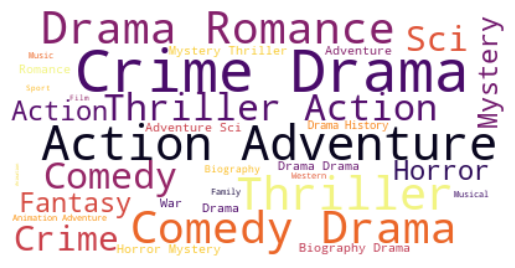

In [30]:
# converting genre to a long string 
genre_txt=" ".join(data["Category"])
# set stop word
stopwords = set(STOPWORDS)
# instantiate a word cloud object
genre_wc=WordCloud(
   background_color="white",
   max_words=500,
   stopwords=stopwords,
   colormap="inferno",
)
# generate the word cloud
genre_wc.generate(genre_txt)
# displaying the word cloud
plt.imshow(genre_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

from te result we can see that the most popular genre are crime drame, comedy drame, drama romance , action adventure

#### IMDb Ratings vs Meta Score

Text(0.5, 1.0, 'Frequency of Meta score ratings')

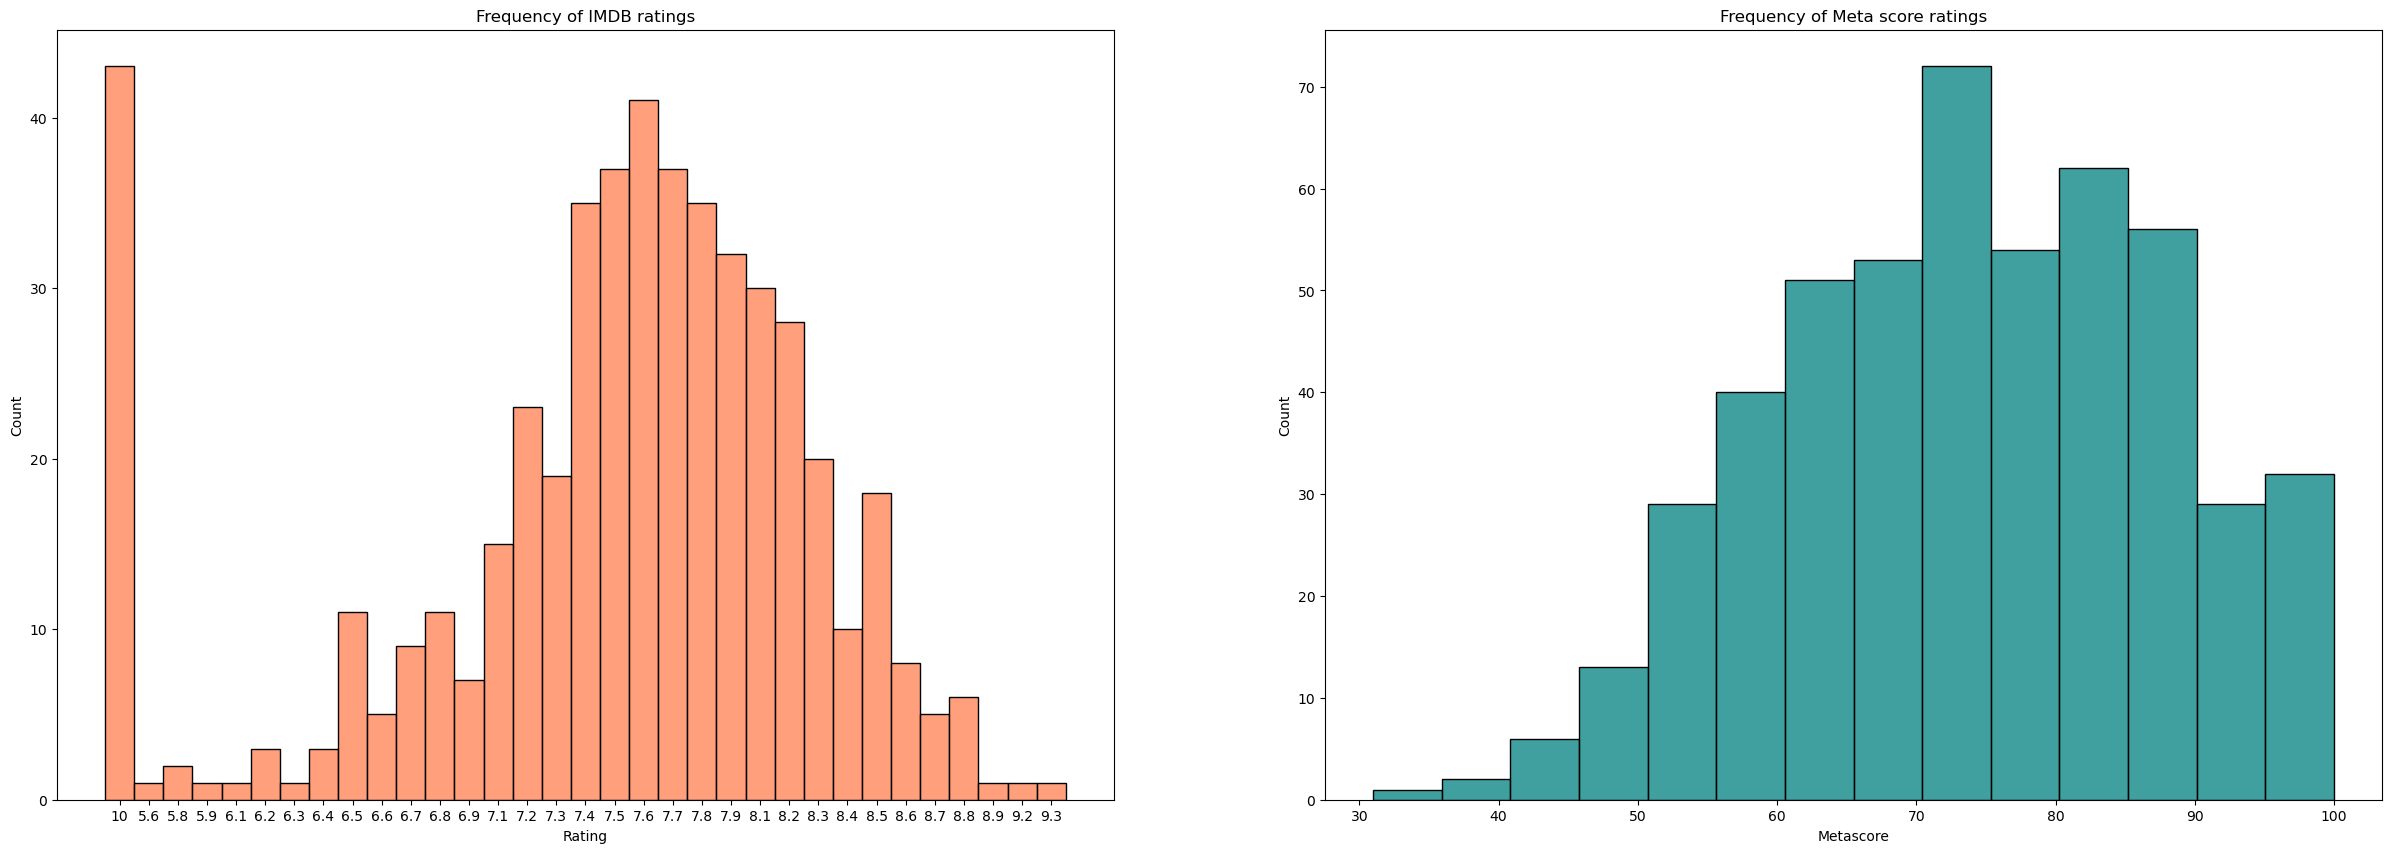

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

sns.histplot(data['Rating'].sort_values(), color= 'coral', ax=axes[0])
axes[0].set_title('Frequency of IMDB ratings')

sns.histplot(data['Metascore'].sort_values(), color= 'teal', ax=axes[1])
axes[1].set_title('Frequency of Meta score ratings')

checking the frequency of imdb ratings and metascore ratings

In [32]:
top_10_metascore = data.sort_values(by=['Metascore'], ascending= False).head(10).reset_index(drop = True)
top_10_IMDB = data.sort_values(by=['Rating'], ascending= False).head(10).reset_index(drop= True)

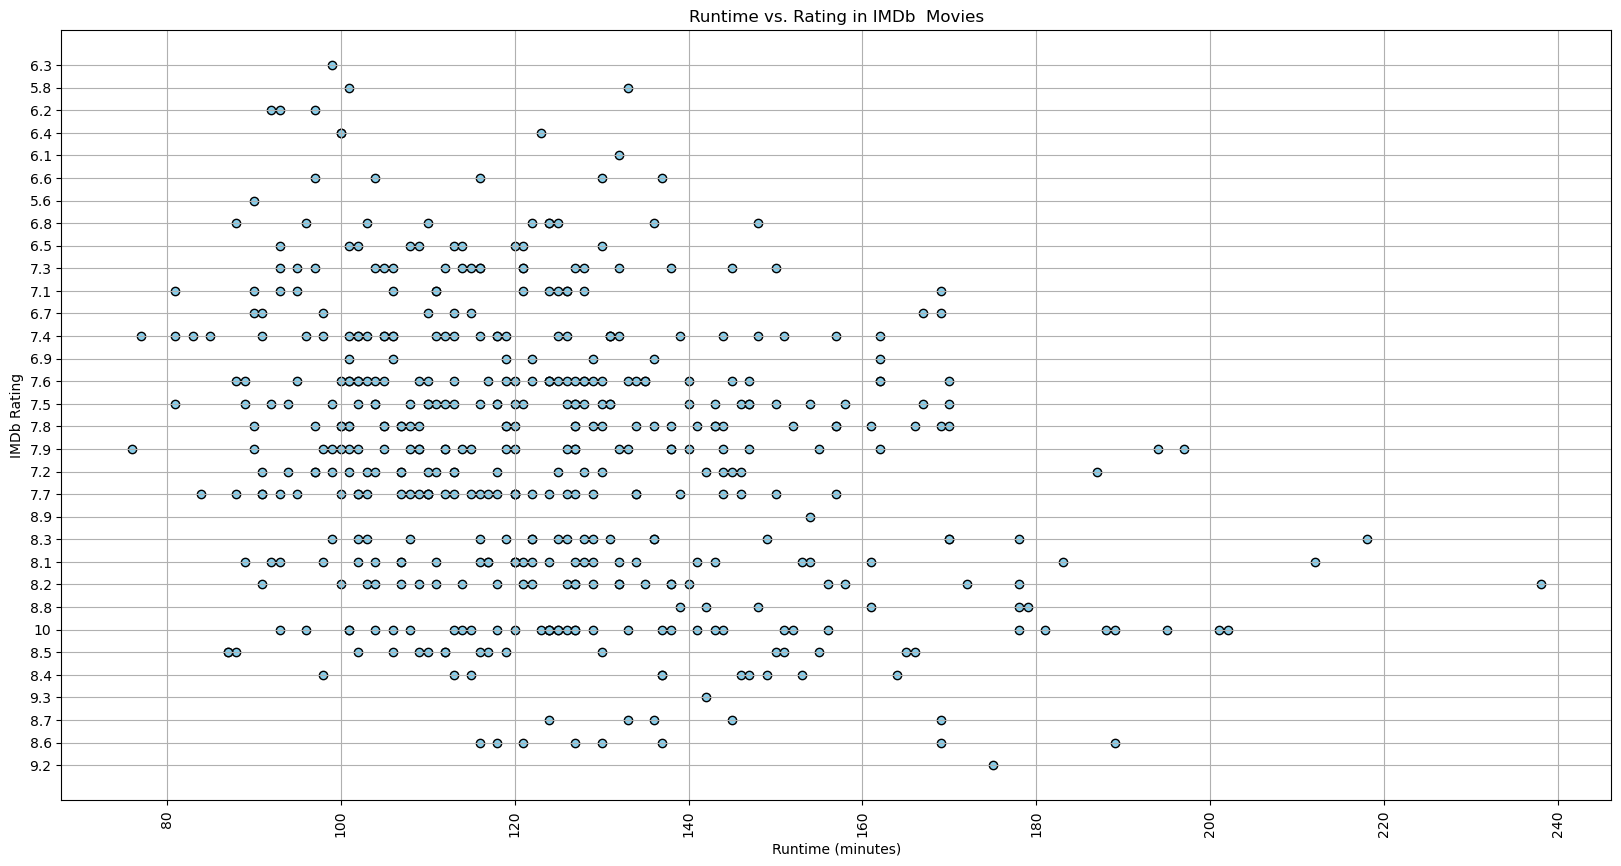

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(copy_data['Run_Time'], copy_data['Rating'], color='skyblue', edgecolor='black')
plt.title('Runtime vs. Rating in IMDb  Movies')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

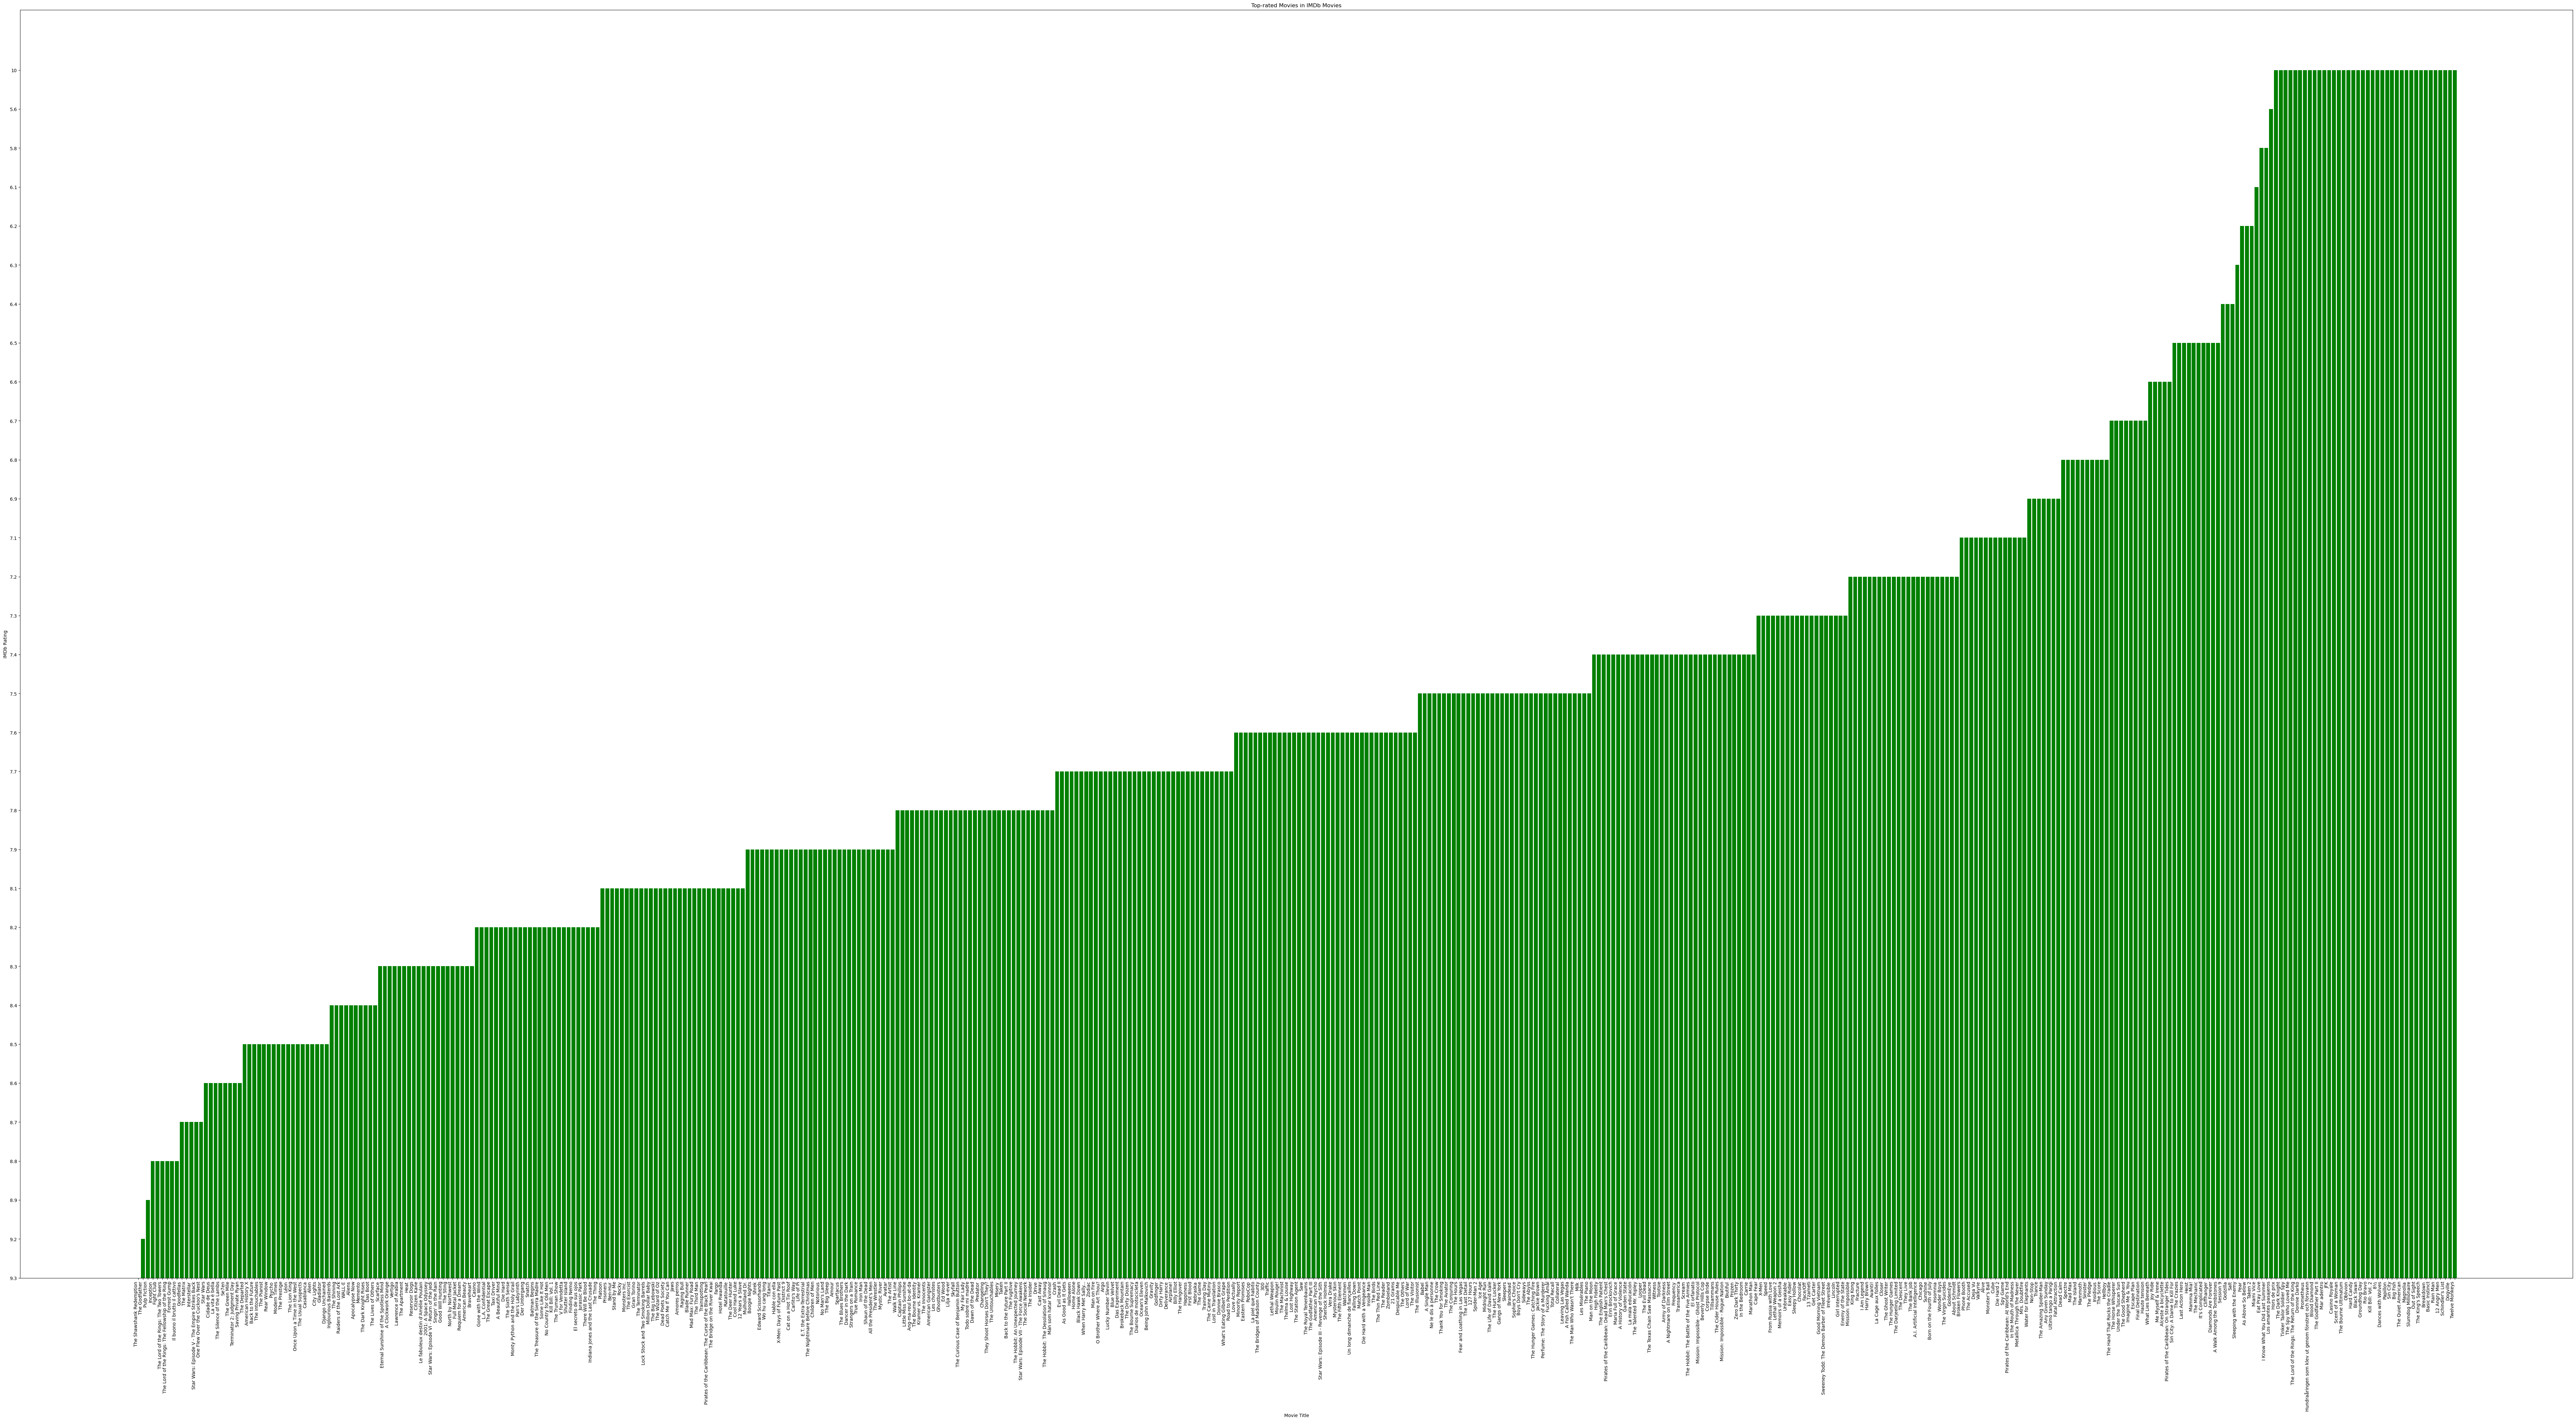

In [34]:
# Sort the DataFrame by rating in descending order to get the top-rated movies
top_rated_movies =copy_data.sort_values(by='Rating', ascending=False)

# Plotting a bar chart for the top-rated movies
plt.figure(figsize=(100, 50))
plt.bar(top_rated_movies['Movie_Title'], top_rated_movies['Rating'], color='green')
plt.title('Top-rated Movies in IMDb Movies')
plt.xlabel('Movie Title')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()

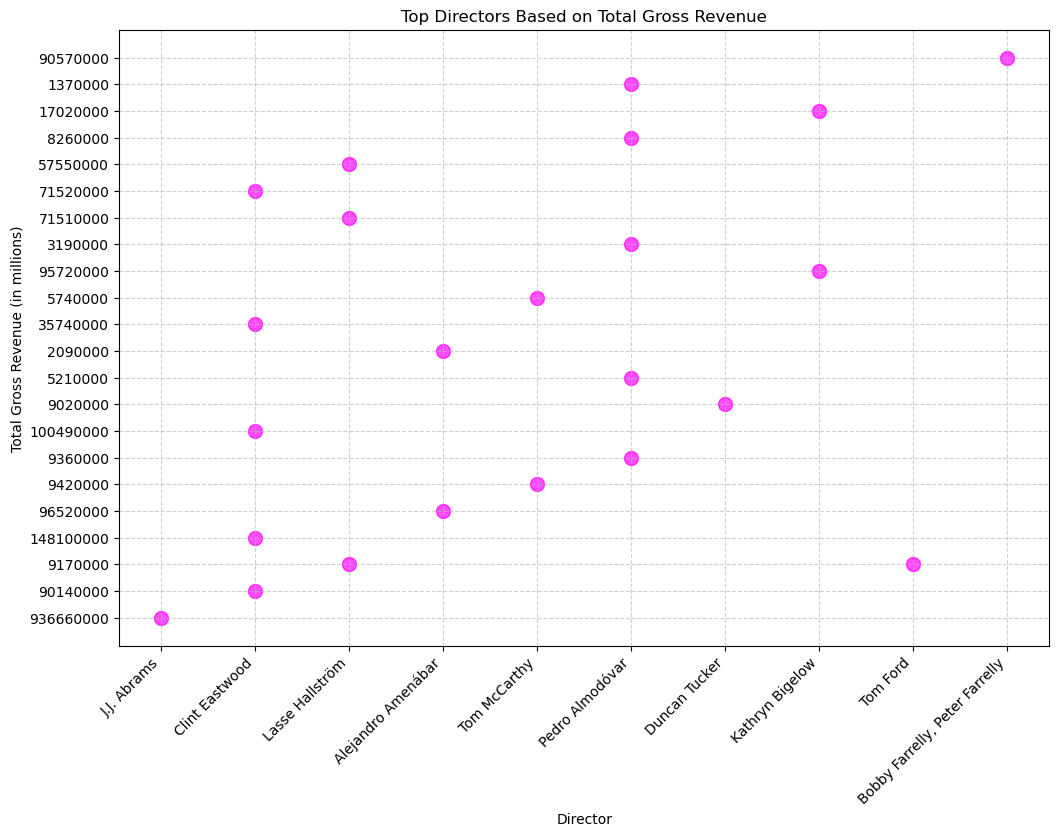

In [35]:
director_gross = copy_data.groupby('Director')['Gross_Earnings'].sum().sort_values(ascending=False)
top_directors = director_gross.head(10)
top_directors_data = copy_data[copy_data['Director'].isin(top_directors.index)]
plt.figure(figsize=(12, 8))
plt.scatter(top_directors_data['Director'], top_directors_data['Gross_Earnings'], s=100, c='magenta', alpha=0.7)
plt.xlabel('Director')
plt.ylabel('Total Gross Revenue (in millions)')
plt.title('Top Directors Based on Total Gross Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

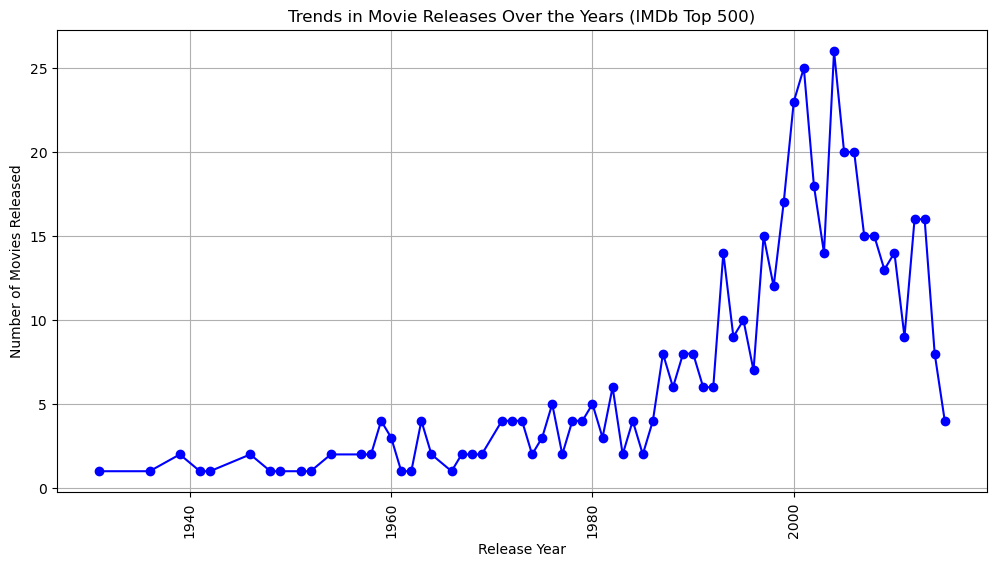

In [36]:
release_counts = copy_data['Release_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(release_counts.index, release_counts.values, marker='o', linestyle='-', color='b')
plt.title('Trends in Movie Releases Over the Years (IMDb Top 500)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [43]:
frequent_directors = copy_data.groupby('Director').count().sort_values(by=['Movie_Title'], ascending= False).head(10).reset_index()


In [44]:
# List of frequent directors
frequent_directors['Director'].to_list()

['Steven Spielberg',
 'Martin Scorsese',
 'Peter Jackson',
 'Christopher Nolan',
 'Quentin Tarantino',
 'Ridley Scott',
 'Alfred Hitchcock',
 'David Fincher',
 'James Cameron',
 'Tim Burton']

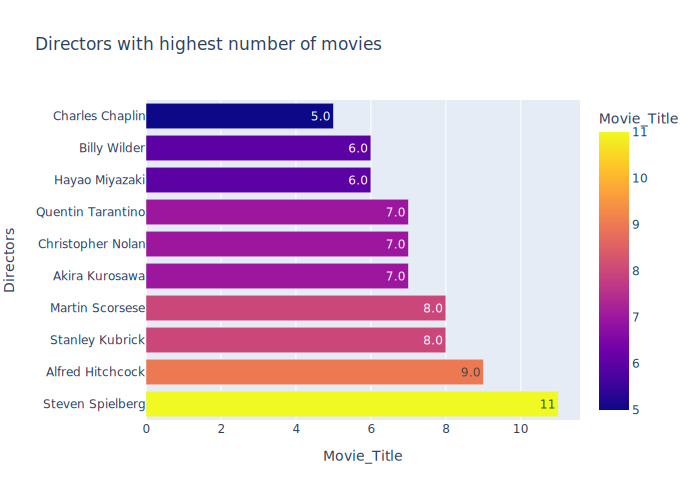

In [48]:
fig = px.bar(frequent_directors, y=['Steven Spielberg',
 'Alfred Hitchcock',
 'Stanley Kubrick',
 'Martin Scorsese',
 'Akira Kurosawa',
 'Christopher Nolan',
 'Quentin Tarantino',
 'Hayao Miyazaki',
 'Billy Wilder',
 'Charles Chaplin'], x='Movie_Title', text_auto='.2s', color="Movie_Title",
             title="Directors with highest number of movies",
             labels={'x':'Number_of_movies', 'y': 'Directors'})

# Rendering the image as an svg file
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

From the result we can see that there are two directors who have high number of movies; Alfred Hitchcock and Steven Spielberg followed by Stanley Kubrick and Martin Scorsese

### Movies with highest Meta Score Vs Movies with highest IMDb rating

In [40]:
copy_data.columns

Index(['Movie_Title', 'Run_Time', 'Release_Year', 'Category', 'Rating',
       'Metascore', 'Votes_Count', 'Gross_Earnings', 'Director', 'Stars'],
      dtype='object')

In [41]:
top_10_metascore = copy_data.sort_values(by=['Metascore'], ascending= False).head(10).reset_index(drop = True)

In [42]:
# List of top 10 movies by critics
top_10_metascore['Movie_Title'].to_list()

['The Godfather',
 'Rear Window',
 'Vertigo',
 'Avanti!',
 'Citizen Kane',
 'Notorious',
 'Lawrence of Arabia',
 'Casablanca',
 'City Lights',
 "Singin' in the Rain"]

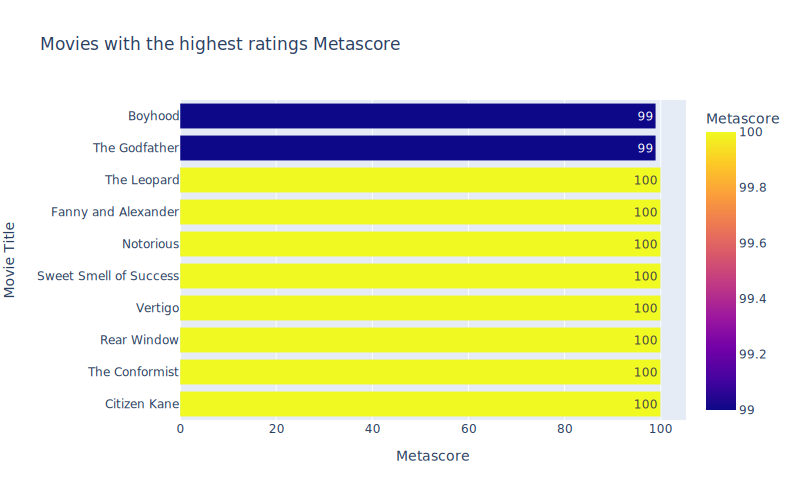

In [44]:
#Bar plot for top 10 movies by critics
fig = px.bar(top_10_metascore, y=['Citizen Kane',
 'The Conformist',
 'Rear Window',
 'Vertigo',
 'Sweet Smell of Success',
 'Notorious',
 'Fanny and Alexander',
 'The Leopard',
 'The Godfather',
 'Boyhood'], x='Metascore', text_auto='.2s', color="Metascore",
             title="Movies with the highest ratings Metascore",
             labels={'x':'MetaScore', 'y': 'Movie Title'}, width = 800, height = 500)
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

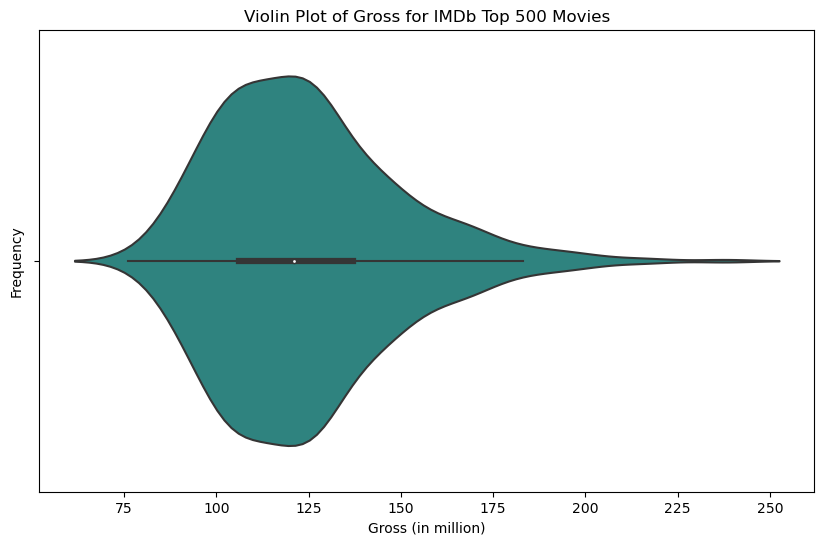

In [50]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Run_Time', data=copy_data, palette='viridis')

plt.xlabel('Gross (in million)')
plt.ylabel('Frequency')
plt.title('Violin Plot of Gross for IMDb Top 500 Movies')

#Show the plot
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9988\1753489251.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



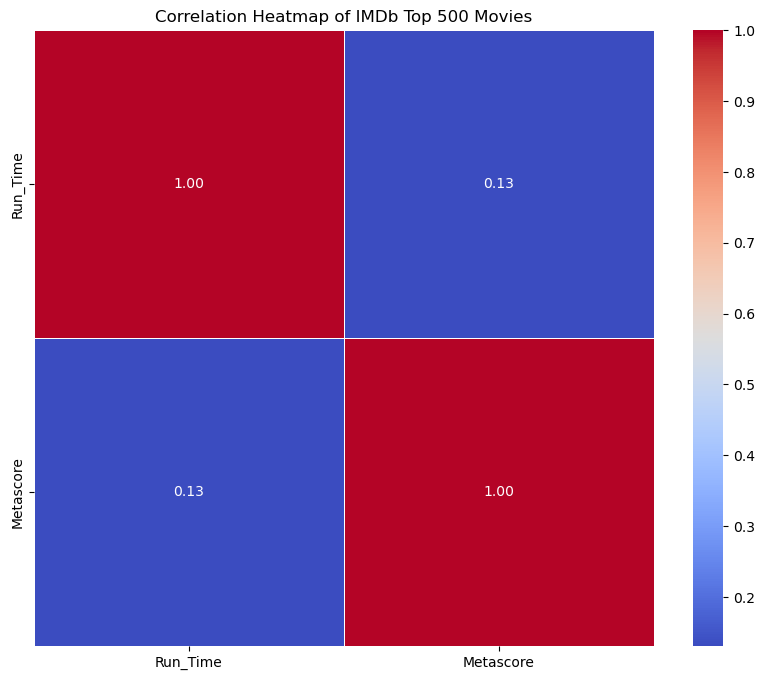

In [49]:

numerical_columns = ['Rating', 'Gross_Earnings', 'Run_Time', 'Metascore']

correlation_matrix = copy_data[numerical_columns].corr()

#Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

#Set plot title
plt.title('Correlation Heatmap of IMDb Top 500 Movies')

#Show the plot
plt.show()